In [1]:
import numpy as np
import pandas as pd

In [3]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
s = pd.Series([1,2,3,4,5,6,7,8],index = index_val)
s

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [4]:
s[('cse',2019)]

np.int64(1)

In [5]:
# Problem is we cannot fetch details of all cse indexes
# Hence this is not numtiindex

In [6]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [8]:
# Lets create a multiindex series
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [11]:
s['cse']
s['ece']
s[('cse',2019)]

np.int64(1)

In [13]:
# To convert this multiindex series into DataFrame
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [14]:
# to reverse
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [15]:
# MultiIndex DataFrame
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [18]:
branch_df1['students']
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [19]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [23]:
branch_df2['mumbai']['students']

2019    0
2020    0
2021    0
2022    0
Name: students, dtype: int64

In [24]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

## stack and unstack

In [30]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [31]:
branch_df1.stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [33]:
# Some methods on MultiIndex
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [34]:
branch_df3.shape

(8, 4)

In [35]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [37]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [38]:
# Extracting Single Row
branch_df3.loc[('cse',2019)]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: (cse, 2019), dtype: int64

In [39]:
# rest all works same

In [40]:
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [41]:
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

## Long Vs Wide Data

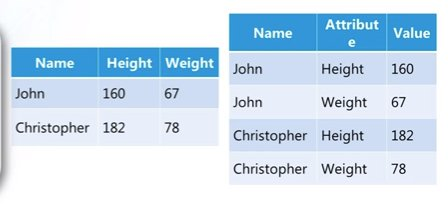


Wide format is where we have a single row for every data point with multiple columns to hold the values of various attributes.

Long format is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [43]:
# melt -> wide to long
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [44]:
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [47]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70
